In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_orig = pd.read_excel("E:\LetsUpgrade-AI-ML\Assignments\Day 21 - Linear-Logistics Regression\Bank_Personal_Loan_Modelling.xlsx","Data")

In [14]:
df_orig.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [15]:
#Columns in the datset
df_orig.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
#Data types for each attributes
df_orig.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [17]:
# Creating copy of original dataframe 
df = df_orig.copy()

In [18]:
# For our convenience, let us make target attribute "Personal Loan" as the last column of our dataframe.
df.drop('Personal Loan',axis=1,inplace=True)
df['Personal Loan'] = df_orig['Personal Loan']

In [19]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [20]:
# Shape of dataframe
df.shape

(5000, 14)

In [21]:
# More info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [22]:
# Let us check the dataset for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [23]:
#Summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# Observations:

'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.

Remaining numeric columns such as Age, Income, CCAvg, Mortgage seem to be fine and no data cleaning is required

The customer ages are in the range of 23 to 67 with average age as 45. Quarter of the customer population is below 35.

Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.

In [24]:
# Let us see how many negative entries are there in the Experience column
df[df['Experience']<0].Experience.count()

52

In [25]:
# Let us see how many unique negative entries are there?
df[df['Experience']<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

# Observations from Experience data 

There there unique negative entries -1,-2 and -3 in the experience column.

Let us clean the Experience column by removing the negative entries with appropriate values

In order to get the appropriate values, let take a cue from correlation of Experience attribute with other attributes

In [26]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.015087,0.136537,-0.003620,-0.006686,0.366891
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


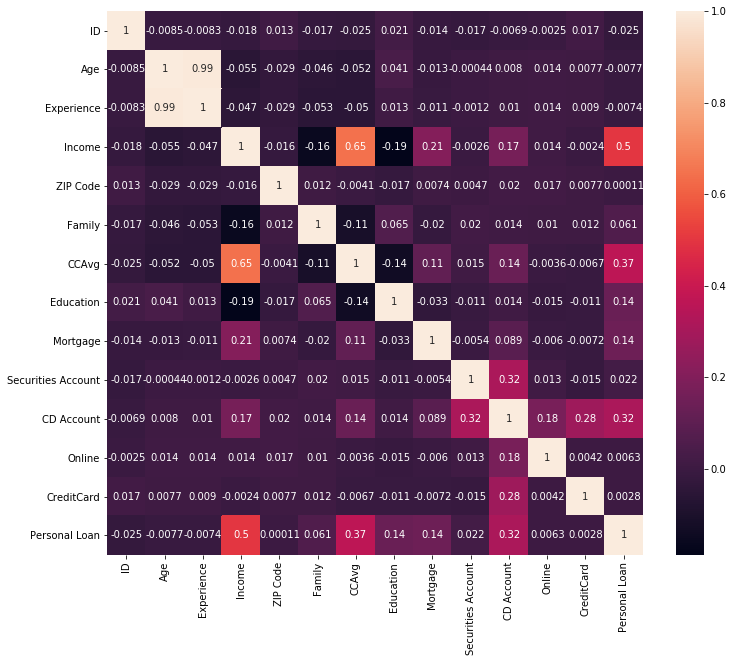

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

# Observations from Correlation data

As there is high correlation between Age and Experience, we can drop Experience column

In [28]:
df.drop(["Experience","ID","ZIP Code"],axis=1,inplace=True)

In [29]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


In [30]:
# Let us see the distribution 5000 entries in target column
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

### 480 customers out of 5000 had opted for personal loan in the previous campaign

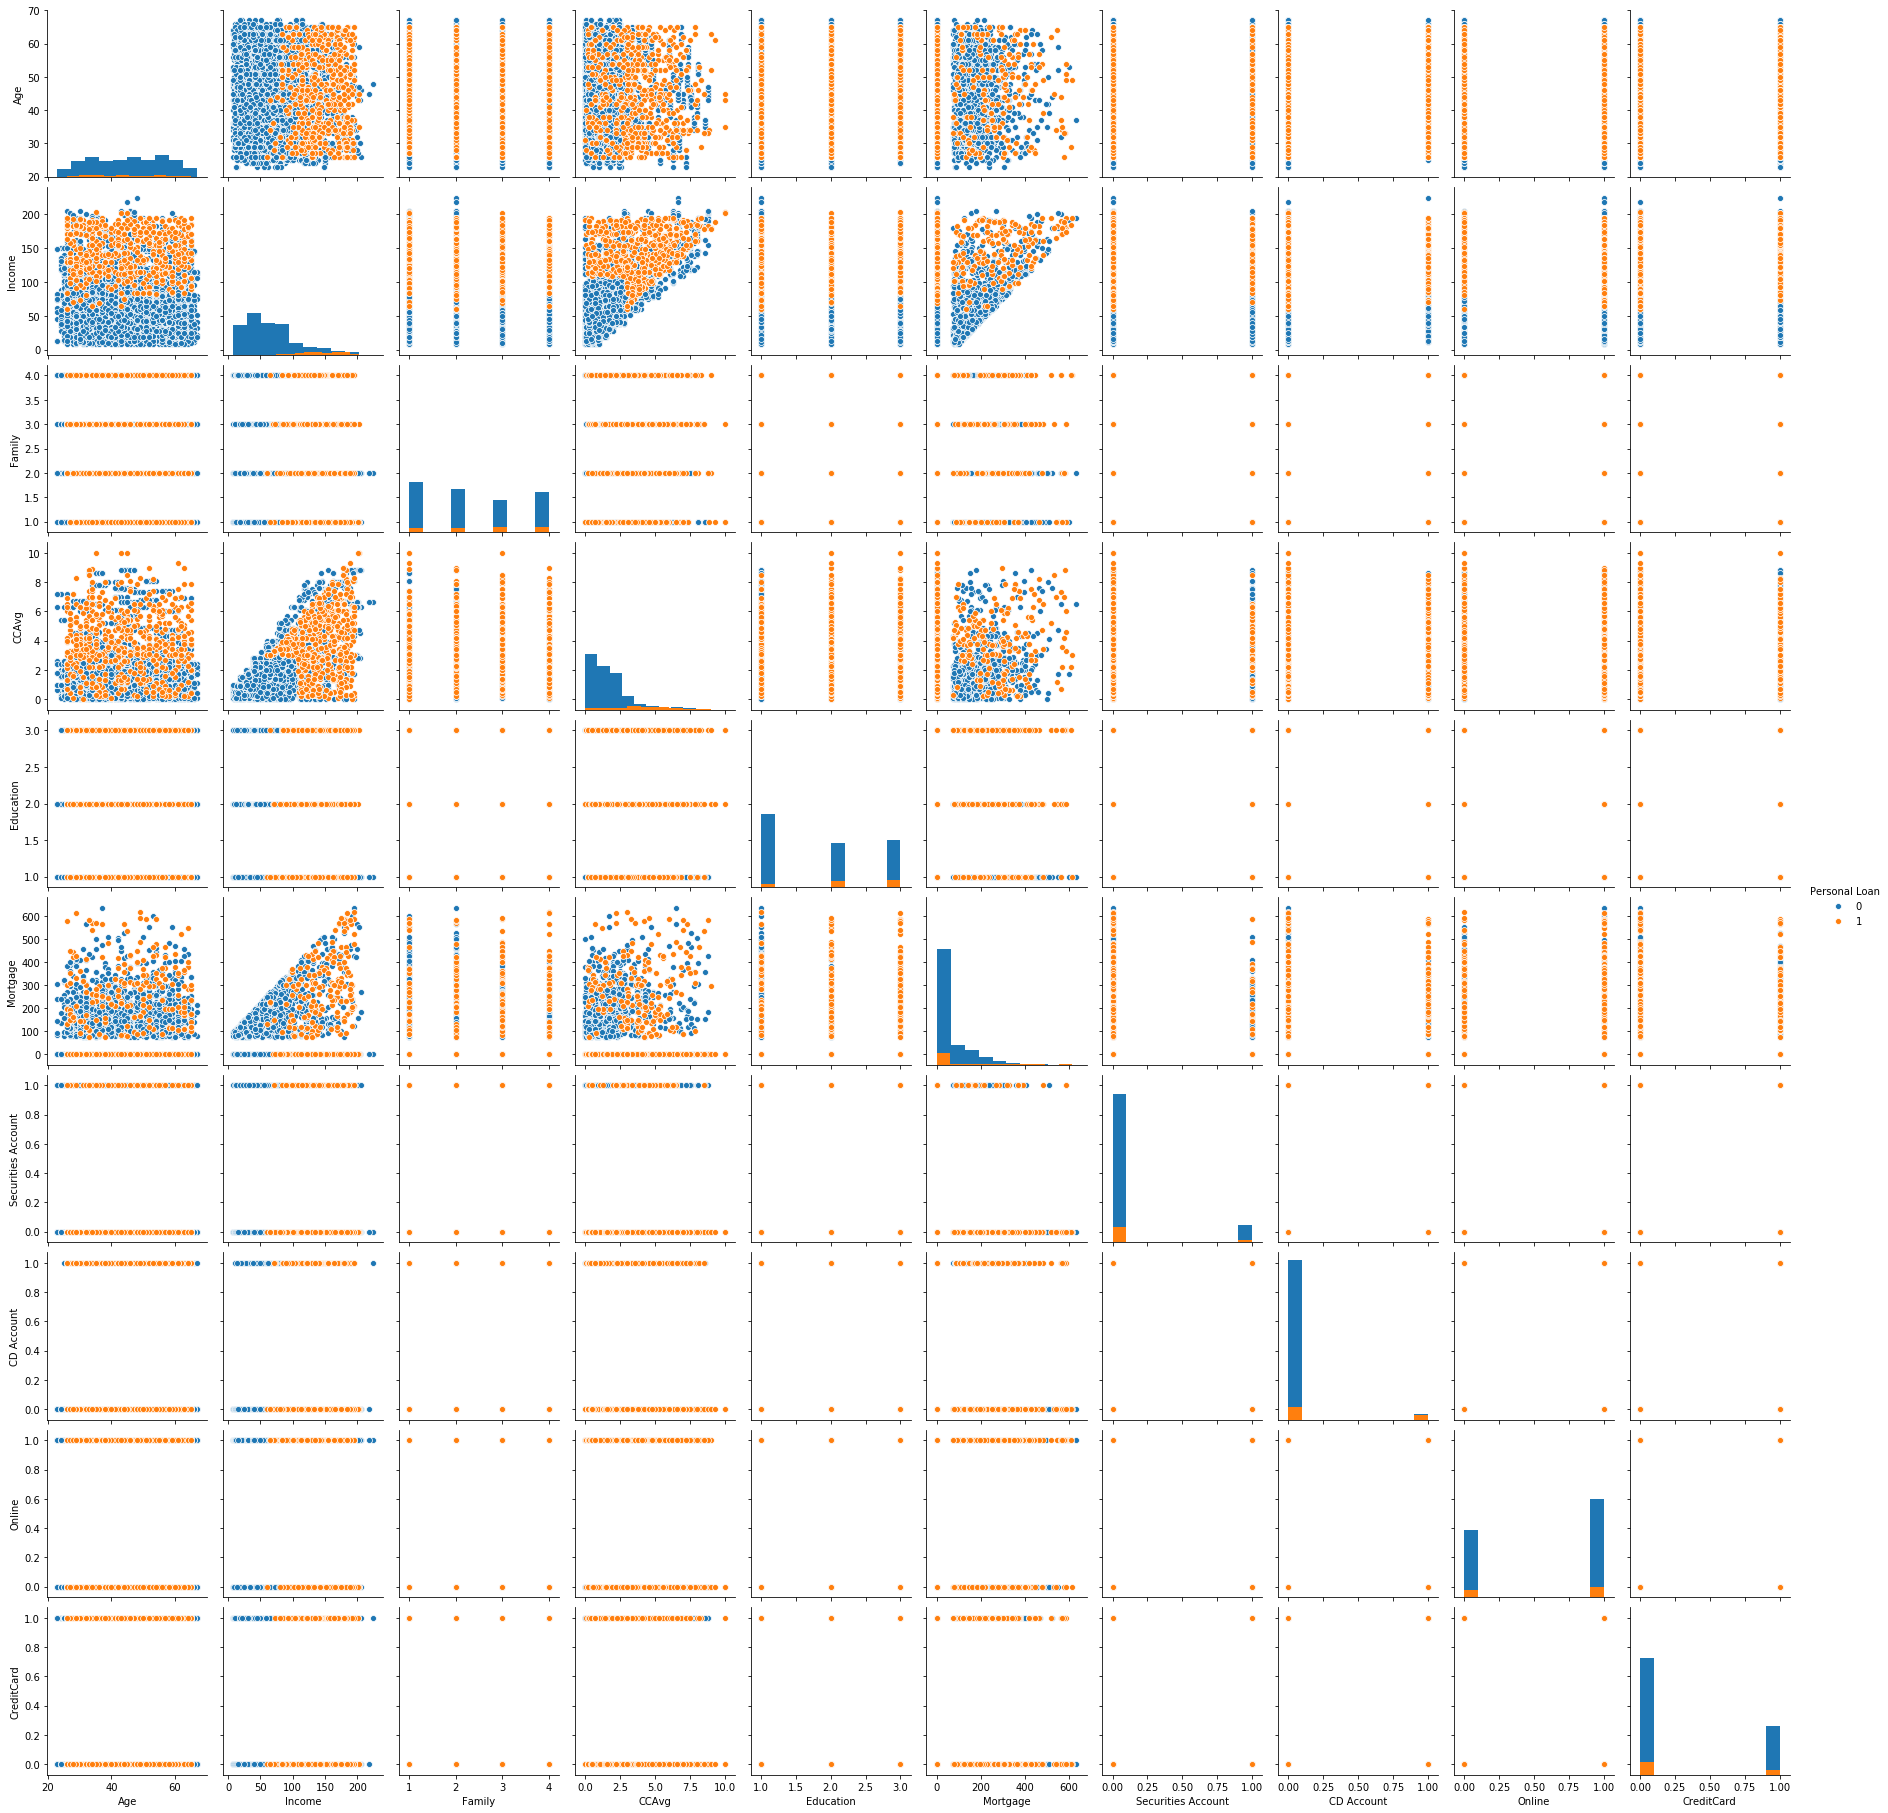

In [31]:
# Before moving further, let us plot the pairplot using all attributes
sns.pairplot(df,hue='Personal Loan',diag_kind='hist')

In [32]:
# Let us see the correlation of all independent attributes with target attribute i.e., personal loan 
df.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Name: Personal Loan, dtype: float64

#### From qualitative and quantitative exploratory data analysis done until now, one can see that Income and CCAvg are two most important features deciding whether a customer will buy a personal loan or not. Other attributes such as CD Account, Mortgage, Education, Family, Securities Account are also of some importance as per their mentioned order. But, let us verify the importance of above attributes using statistical approach.

#### Since, Age has very low correlation with target attribute, they seem to be ineffective for predicting whether customer will buy a personal loan or not. But is this statement statistically correct? Whether Age and Experience have no influence in predicting the target attribute?

In [33]:
# Significance test for numerical columns
import statsmodels.api as sm

X = df[['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 'Securities Account', 'Age']]
Y = df['Personal Loan']
X1 = sm.add_constant(X)
Logistics = sm.Logit(Y,X1)
result = Logistics.fit()

Optimization terminated successfully.
         Current function value: 0.133164
         Iterations 9


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5789
Time:                        15:26:35   Log-Likelihood:                -665.82
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.2209      0.656    -21.680      0.000     -15.507     -12.935
Income                 0.0543      0.003     21.309      0.000       0.049       0.059
CCAvg                  0.1193      0.039      3.074      0.002       0.043       0.195
CD Account             2.7366      0.258     10.597      0.000       2.230       3.243
Mortgage               0.0005      0.001      0.985      0.324      -0.001       0.002
Education              1.6932      0.111     15.322      0.000       1.477       1.910
Family                 0.6883      0.073      9.466      0.000       0.546       0.831
Securities Account    -0.5995      0.271     -2.212      0.027      -1.131      -0.068
Age                    0.0097      0.006      1.522      0.128      -0.003       0.022
======================================================================================
"""

### Observations

Looking at the p-value from the above results, we can see that the p-value for Mortgage and Age are above 0.05. We can say with confidence that 'Mortgage' and 'Age' both have no statistical significant association with 'Personal Loan', since their p-value in logistic regression < 0.05

In [35]:
X = df[['Income', 'CCAvg', 'CD Account', 'Education', 'Family', 'Securities Account']]
Y = df['Personal Loan']
X1 = sm.add_constant(X)
Logistics = sm.Logit(Y,X1)
result = Logistics.fit()

Optimization terminated successfully.
         Current function value: 0.133493
         Iterations 9


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4993
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5778
Time:                        15:26:35   Log-Likelihood:                -667.46
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.6927      0.551    -24.839      0.000     -14.773     -12.612
Income                 0.0544      0.003     21.559      0.000       0.049       0.059
CCAvg                  0.1101      0.039      2.859      0.004       0.035       0.186
CD Account             2.7596      0.258     10.681      0.000       2.253       3.266
Education              1.6811      0.110     15.339      0.000       1.466       1.896
Family                 0.6848      0.073      9.435      0.000       0.543       0.827
Securities Account    -0.6068      0.271     -2.240      0.025      -1.138      -0.076
======================================================================================
"""

# Final Equation

p=

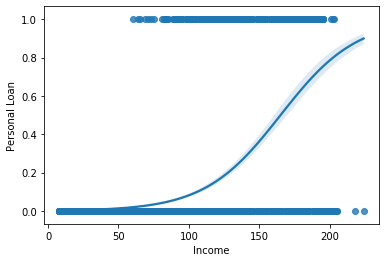

In [37]:
import seaborn as sns
sns.regplot(x='Income', y='Personal Loan', data=df, logistic=True)